In [222]:
### importing and installing Flair library for check sentiment of a text and all other libraries
import flair
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import string
import nltk
import codecs
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
### Install Necussary Packages
#!pip install matplotlib
#!pip install nltk

In [ ]:
### Download NlTK Related Packages
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('words')

In [210]:
#### NLTK Modules ####
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import words
from sklearn.model_selection import train_test_split

lemmatizer = WordNetLemmatizer() 
english_vocab = set(w.lower() for w in nltk.corpus.words.words())
eng_stop_words = set(stopwords.words('english'))


In [3]:
# ### Loading sentiment model of english
sentiment_model = flair.models.TextClassifier.load('en-sentiment')

2021-08-16 14:05:17,521 loading file C:\Users\616777\.flair\models\sentiment-en-mix-distillbert_4.pt


In [ ]:
# sentence = flair.data.Sentence('oh god')
0 -- decreased
1 -- increased or stayed same

In [4]:
### Read data input from csv 
data_input = pd.read_csv("Combined_News_DJIA.csv")

In [5]:
### Top 5 records
data_input.head(5)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,08-08-2008,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,11-08-2008,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,12-08-2008,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,13-08-2008,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,14-08-2008,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [6]:
### Bottom 5 records
data_input.tail(5)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
1984,27-06-2016,0,Barclays and RBS shares suspended from trading...,Pope says Church should ask forgiveness from g...,Poland 'shocked' by xenophobic abuse of Poles ...,"There will be no second referendum, cabinet ag...","Scotland welcome to join EU, Merkel ally says",Sterling dips below Friday's 31-year low amid ...,No negative news about South African President...,Surge in Hate Crimes in the U.K. Following U.K...,...,German lawyers to probe Erdogan over alleged w...,"Boris Johnson says the UK will continue to ""in...",Richard Branson is calling on the UK governmen...,Turkey 'sorry for downing Russian jet',Edward Snowden lawyer vows new push for pardon...,Brexit opinion poll reveals majority don't wan...,"Conservative MP Leave Campaigner: ""The leave c...","Economists predict UK recession, further weake...","New EU 'superstate plan by France, Germany: Cr...",Pakistani clerics declare transgender marriage...
1985,28-06-2016,1,"2,500 Scientists To Australia: If You Want To ...","The personal details of 112,000 French police ...",S&amp;P cuts United Kingdom sovereign credit r...,Huge helium deposit found in Africa,CEO of the South African state broadcaster qui...,"Brexit cost investors $2 trillion, the worst o...",Hong Kong democracy activists call for return ...,Brexit: Iceland president says UK can join 'tr...,...,"US, Canada and Mexico pledge 50% of power from...",There is increasing evidence that Australia is...,"Richard Branson, the founder of Virgin Group, ...","37,000-yr-old skull from Borneo reveals surpri...",Palestinians stone Western Wall worshipers; po...,Jean-Claude Juncker asks Farage: Why are you h...,"""Romanians for Remainians"" offering a new home...",Brexit: Gibraltar in talks with Scotland to st...,8 Suicide Bombers Strike Lebanon,Mexico's security forces routinely use 'sexual...
1986,29-06-2016,1,Explosion At Airport In Istanbul,Yemeni former president: Terrorism is the offs...,UK must accept freedom of movement to access E...,Devastated: scientists too late to captive bre...,British Labor Party leader Jeremy Corbyn loses...,A Muslim Shop in the UK Was Just Firebombed Wh...,Mexican Authorities Sexually Torture Women in ...,UK shares and pound continue to recover,...,"Escape Tunnel, Dug by Hand, Is Found at Holoca...",The land under Beijing is sinking by as much a...,Car bomb and Anti-Islamic attack on Mosque in ...,Emaciated lions in Taiz Zoo are trapped in blo...,Rupert Murdoch describes Brexit as 'wonderful'...,More than 40 killed in Yemen suicide attacks,Google Found Disastrous Symantec and Norton Vu...,Extremist violence on the rise in Germany: Dom...,BBC News: Labour MPs pass Corbyn no-confidence...,Tiny New Zealand town with 'too many jobs' lau...
1987,30-06-2016,1,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,Boris Johnson says he will not run for Tory pa...,Six gay men in Ivory Coast were abused and for...,Switzerland denies citizenship to Muslim immig...,Palestinian terrorist stabs israeli teen girl ...,Puerto Rico will default on $1 billion of debt...,Republic of Ireland fans to be awarded medal f...,...,Googles free wifi at Indian railway stations i...,Mounting evidence suggests 'hobbits' were wipe...,The men who carried out Tuesday's terror attac...,Calls to suspend Saudi Arabia from UN Human Ri...,More Than 100 Nobel Laureates Call Out Greenpe...,British pedophile sentenced to 85 years in US ...,"US permitted 1,200 offshore fracks in Gulf of ...",We will be swimming in ridicule - French beach...,UEFA says no minutes of silence for Istanbul v...,Law Enforcement Sources: Gun Used in Paris Ter...
1988,01-07-2016,1,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,"The president of France says if Brexit won, so...",British Man Who Must Give Police 24 Hours' Not...,100+ Nobel laureates 

In [7]:
### Elementey data analysis
data_input.isna().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

In [8]:
#### Now drop na values from the data set
data_input=data_input.dropna()

In [9]:
data_input.isna().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    0
Top24    0
Top25    0
dtype: int64

In [10]:
data_input.count()

Date     1986
Label    1986
Top1     1986
Top2     1986
Top3     1986
Top4     1986
Top5     1986
Top6     1986
Top7     1986
Top8     1986
Top9     1986
Top10    1986
Top11    1986
Top12    1986
Top13    1986
Top14    1986
Top15    1986
Top16    1986
Top17    1986
Top18    1986
Top19    1986
Top20    1986
Top21    1986
Top22    1986
Top23    1986
Top24    1986
Top25    1986
dtype: int64

In [11]:
### Now convert all the columns to rows 
data_input_new = data_input.melt(id_vars=["Date", "Label"], 
        var_name="News_Label",
        value_name="News_Headlines")
data_input_new = data_input_new[["Date","Label","News_Headlines"]]

In [12]:
### Top 5 Headlines
data_input_new.head(5)

,Date,Label,News_Headlines
0,08-08-2008,0,"b""Georgia 'downs two Russian warplanes' as cou..."
1,11-08-2008,1,b'Why wont America and Nato help us? If they w...
2,12-08-2008,0,b'Remember that adorable 9-year-old who sang a...
3,13-08-2008,0,b' U.S. refuses Israel weapons to attack Iran:...
4,14-08-2008,1,b'All the experts admit that we should legalis...


In [13]:
### Bottom 5 Headlines
data_input_new.tail(5)

,Date,Label,News_Headlines
49645,27-06-2016,0,Pakistani clerics declare transgender marriage...
49646,28-06-2016,1,Mexico's security forces routinely use 'sexual...
49647,29-06-2016,1,Tiny New Zealand town with 'too many jobs' lau...
49648,30-06-2016,1,Law Enforcement Sources: Gun Used in Paris Ter...
49649,01-07-2016,1,Ozone layer hole seems to be healing - US &amp...


In [14]:
### Now Data Preprocessing on Input data to eliminate un necussary data
def datapreprocess_fun(dtpp_raw_data):
    """ Data Preprocessing to remove numbers,punctuation,pos_tagging,lemmatization of words """
    dtpp_raw_pun = re.sub(r'\d+', '', str(dtpp_raw_data).lower())
    punctu_obj = str.maketrans('', '', string.punctuation)
    dtpp_pos_tag = ' '.join(dtpp_raw_pun.translate(punctu_obj).split())
    return dtpp_pos_tag

In [15]:
def datapreprocess_fun_V1(dtpp_raw_data):
    """ Data Preprocessing to remove numbers,punctuation,pos_tagging,lemmatization of words """
    dtpp_raw_data = pos_tag(word_tokenize(dtpp_raw_data))
    dtpp_lemmas = []
    for raw_lm_word in dtpp_raw_data:
        raw_lm_word_pos = raw_lm_word[-1]
        raw_lm_word_value = raw_lm_word[0]
        if  raw_lm_word_pos[0] == 'N' or  raw_lm_word_pos[0] == 'J' or  raw_lm_word_pos[0] == 'R' or  raw_lm_word_pos[0] == 'V':
            pos_tag_value = raw_lm_word_pos[0].lower()
            if pos_tag_value != 'j':
                dtpp_lemmas.append(lemmatizer.lemmatize(raw_lm_word_value,pos_tag_value))
            else:
                dtpp_lemmas.append(lemmatizer.lemmatize(raw_lm_word_value))
        else:
            continue
    dtpp_raw_stopwords = ' '.join(dtpp_lemmas)
    dtpp_word_tokens = word_tokenize(dtpp_raw_stopwords) 
    dtpp_filtered_text = [word for word in dtpp_word_tokens if word not in eng_stop_words]
    return dtpp_filtered_text

In [16]:
def remove_words_no_sense(text):
    """ This Function Removes words which are less then length 2 and greater than 15 and also get their root word """
    list_text = []
    for i in text:
        len_str = len(i)
        if  len_str > 2 and len_str <= 15:
            list_text.append(i)
        elif len_str <= 2 or len_str > 15:
            continue
    return list_text   

In [17]:
#### List to save processed data

data_processed_list_data_tokens = list()
data_processed_list_data = list()

#### Function for Preprossing of Data ####
def data_preprocessing_complete(data_input):
    """ This Function Preprocess the data and add new column """     
    print('Data Preprocessing started')
    length_dp_df = np.shape(data_input)[0]
    width_dp_df = np.shape(data_input)[1]
    for i in range(length_dp_df):
        data_modi_list = list()
        data_modi_list_new_V1 = list()
        for k in range(width_dp_df):
                data = data_input.iloc[i][k]
                if data[0:2] == "b\"" or data[0:2] == "b\'":
                        data = data[2:]
                else:
                    pass
                ########## Function to process data ####
                data_pos_tag =  datapreprocess_fun(data)
                data_filtered_text = datapreprocess_fun_V1(data_pos_tag)
                ########## Stage to Remove words less than 2 and greater then 15 ##########
                data_no_sense = remove_words_no_sense(data_filtered_text)
                data_modi_list.append(data_pos_tag)
                data_modi_list_new_V1.extend(data_no_sense)
        data_processed_list_data.insert(i,data_modi_list)
        data_processed_list_data_tokens.insert(i,data_modi_list_new_V1)

In [18]:
data_input_new.head(4)

,Date,Label,News_Headlines
0,08-08-2008,0,"b""Georgia 'downs two Russian warplanes' as cou..."
1,11-08-2008,1,b'Why wont America and Nato help us? If they w...
2,12-08-2008,0,b'Remember that adorable 9-year-old who sang a...
3,13-08-2008,0,b' U.S. refuses Israel weapons to attack Iran:...


In [19]:
df_model_data = data_input_new.iloc[:,2:]

In [20]:
data_preprocessing_complete(df_model_data)
print("Data preprocessing completed")

Data Preprocessing started
Data preprocessing completed


In [21]:
data_process_df = pd.DataFrame(data_processed_list_data)

In [22]:
#data_processed_list_data_tokens[0:][2]

['remember', 'adorable', 'yearold', 'sing', 'opening', 'ceremony', 'fake']

In [23]:
data_input_new["News Processed"] = data_process_df
data_input_new["Tokens"] = data_processed_list_data_tokens

In [ ]:
#data_process_df["Tokens"] = data_processed_list_data_tokens

In [24]:
data_input_new.head(5)

,Date,Label,News_Headlines,News Processed,Tokens
0,08-08-2008,0,"b""Georgia 'downs two Russian warplanes' as cou...",georgia downs two russian warplanes as countri...,"[georgia, russian, warplane, country, move, br..."
1,11-08-2008,1,b'Why wont America and Nato help us? If they w...,why wont america and nato help us if they wont...,"[wont, america, nato, help, wont, help, help, ..."
2,12-08-2008,0,b'Remember that adorable 9-year-old who sang a...,remember that adorable yearold who sang at the...,"[remember, adorable, yearold, sing, opening, c..."
3,13-08-2008,0,b' U.S. refuses Israel weapons to attack Iran:...,us refuses israel weapons to attack iran report,"[refuse, israel, weapon, attack, iran, report]"
4,14-08-2008,1,b'All the experts admit that we should legalis...,all the experts admit that we should legalise ...,"[expert, admit, legalise, drug]"


In [25]:
%%time
dict_token = {}
tok_len = len(data_processed_list_data_tokens)
#dict_set = set()
data_corpus = list()
for len_1 in range(tok_len):
    for k in data_processed_list_data_tokens[0:][len_1]:
        data_corpus.append(k)
for len_2 in range(tok_len):
    count = 0
    for k in data_processed_list_data_tokens[0:][len_2]:
        if k not in dict_token.keys():
            #print(data_processed_list_data_tokens[len_1])
            count = data_corpus.count(k)
            dict_token[k] = count
            #print(count)
        else:
            pass
print("process completed")   
### Create Corpus to word count

process completed
Wall time: 9min 37s


In [26]:
df_tokens_count = pd.DataFrame(dict_token.items())
df_tokens_count.columns = ['Data_Tokens','Count']
df_tokens_count = df_tokens_count.sort_values('Count',ascending=False)

In [27]:
df_tokens_count.to_excel("Tokens.xlsx")

In [28]:
df_tokens_count_plot = df_tokens_count.iloc[:50,:]

In [29]:
df_tokens_count_plot.head()

,Data_Tokens,Count
85,say,4834
44,year,2588
276,new,2415
174,world,2412
295,kill,2407


<AxesSubplot:xlabel='Data_Tokens'>

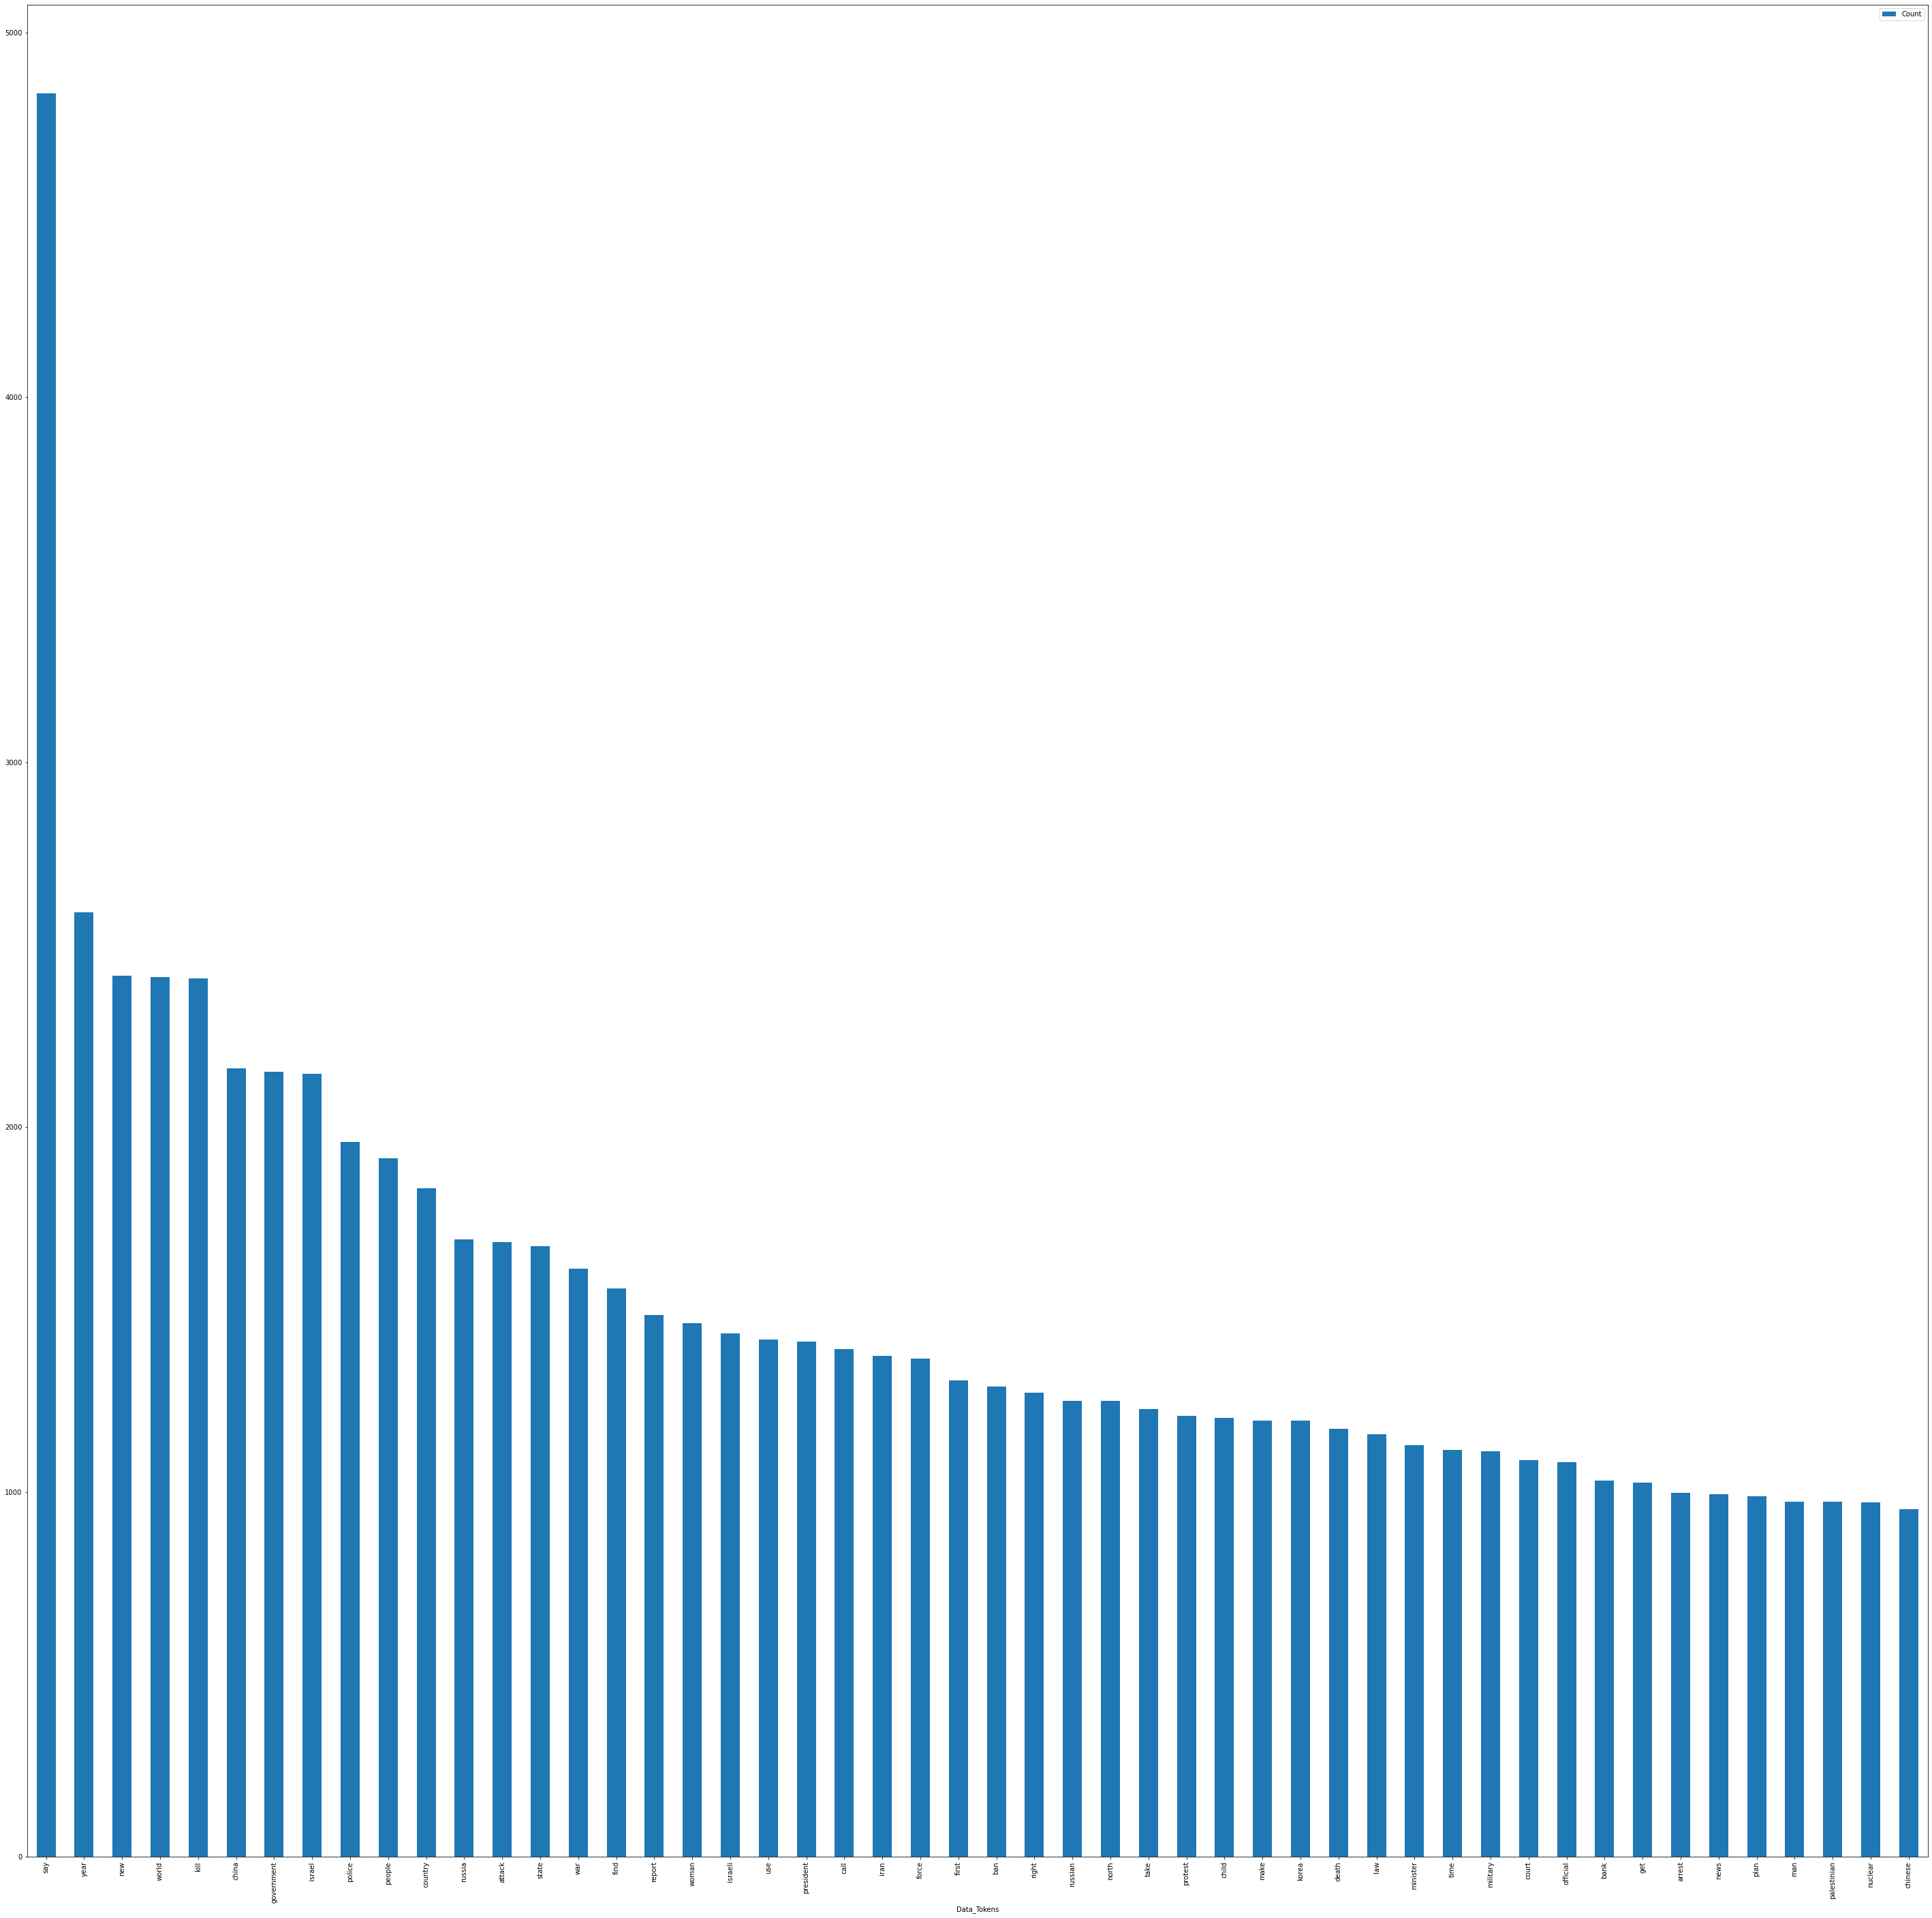

In [30]:
### Bar Plot top 50 values
df_tokens_count_plot.plot(kind='bar',x='Data_Tokens',y='Count',figsize=(50,50))

In [31]:
def datasentiprocess(in_raw):
    """This Function performs sentimential analysis on data"""
    sentence = flair.data.Sentence(in_raw)
    sentiment_model.predict(sentence)
    sentiment = sentence.labels[0].value  # 'POSITIVE' or 'NEGATIVE'
    probability = sentence.labels[0].score  # numerical value 0-1
    return sentiment

In [32]:
### Now begining of sentimental Analysis
data_processed_list_senti = list()
#### Function for Preprossing of Data ####
def Sentimential_analysis(data_input):
    """ This Does a Sentimential Analysis"""    
    print('Data Sentimential Analysis started')
    width_dp_df = np.shape(data_input)[1]
    length_dp_df = np.shape(data_input)[0]
    for i in range(length_dp_df):
        data_modi_list = list()
        data_modi_list1 = list()
        for k in range(width_dp_df):
                data = data_input.iloc[i][k]
                ########## Function to process data ####
                data_senti = datasentiprocess(data)
                data_modi_list.append(data_senti)
        data_processed_list_senti.insert(i,data_modi_list[0])

In [33]:
data_input_new.iloc[:,3:4]

,News Processed
0,georgia downs two russian warplanes as countri...
1,why wont america and nato help us if they wont...
2,remember that adorable yearold who sang at the...
3,us refuses israel weapons to attack iran report
4,all the experts admit that we should legalise ...
...,...
49645,pakistani clerics declare transgender marriage...
49646,mexicos security forces routinely use sexual t...
49647,tiny new zealand town with too many jobs launc...
49648,law enforcement sources gun used in paris terr...


In [34]:
%%time
Sentimential_analysis(data_input_new.iloc[:,3:4])
print("Syntemential analysis completed")

Data Sentimential Analysis started
Syntemential analysis completed
Wall time: 49min 42s


In [35]:
data_processed_list_senti[0:10]

['NEGATIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE']

In [36]:
data_input_new["Sentiment"] = data_processed_list_senti

In [37]:
data_input_new.head(5)

,Date,Label,News_Headlines,News Processed,Tokens,Sentiment
0,08-08-2008,0,"b""Georgia 'downs two Russian warplanes' as cou...",georgia downs two russian warplanes as countri...,"[georgia, russian, warplane, country, move, br...",NEGATIVE
1,11-08-2008,1,b'Why wont America and Nato help us? If they w...,why wont america and nato help us if they wont...,"[wont, america, nato, help, wont, help, help, ...",NEGATIVE
2,12-08-2008,0,b'Remember that adorable 9-year-old who sang a...,remember that adorable yearold who sang at the...,"[remember, adorable, yearold, sing, opening, c...",POSITIVE
3,13-08-2008,0,b' U.S. refuses Israel weapons to attack Iran:...,us refuses israel weapons to attack iran report,"[refuse, israel, weapon, attack, iran, report]",NEGATIVE
4,14-08-2008,1,b'All the experts admit that we should legalis...,all the experts admit that we should legalise ...,"[expert, admit, legalise, drug]",POSITIVE


In [38]:
data_input_new.to_excel("Data_senti.xlsx")

In [39]:
### Plot to sentiment in Complete DataSet
df_plot = data_input_new.groupby("Sentiment").count()["News Processed"]

In [40]:
df_plot

Sentiment
NEGATIVE    40489
POSITIVE     9161
Name: News Processed, dtype: int64

<AxesSubplot:xlabel='Sentiment'>

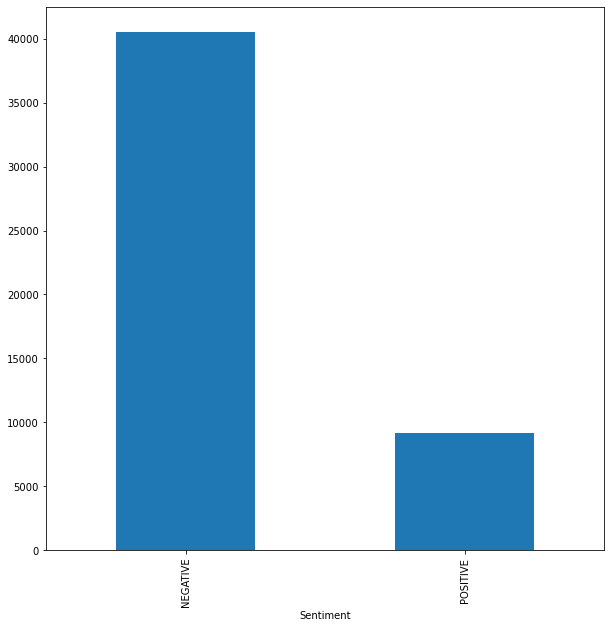

In [41]:
df_plot.plot(kind='bar',figsize=(10,10))

In [42]:
#### Adding New column month and year
month = list()
year  = list()
for i in data_input_new['Date']:
    d1 = i.split('-')
    month.append(d1[1])
    year.append(d1[2])
print("process completed")
print(len(month))
print(len(year))
data_input_new['Month'] = month
data_input_new['Year'] = year

process completed
49650
49650


In [43]:
### Ploting of Graph of market movement with resepct to data
data_input1 = data_input_new[['Month','Year','Label']]

In [44]:
df_plot_mean = (data_input1.groupby(["Month","Year"])['Label'].mean().unstack())

<AxesSubplot:xlabel='Month'>

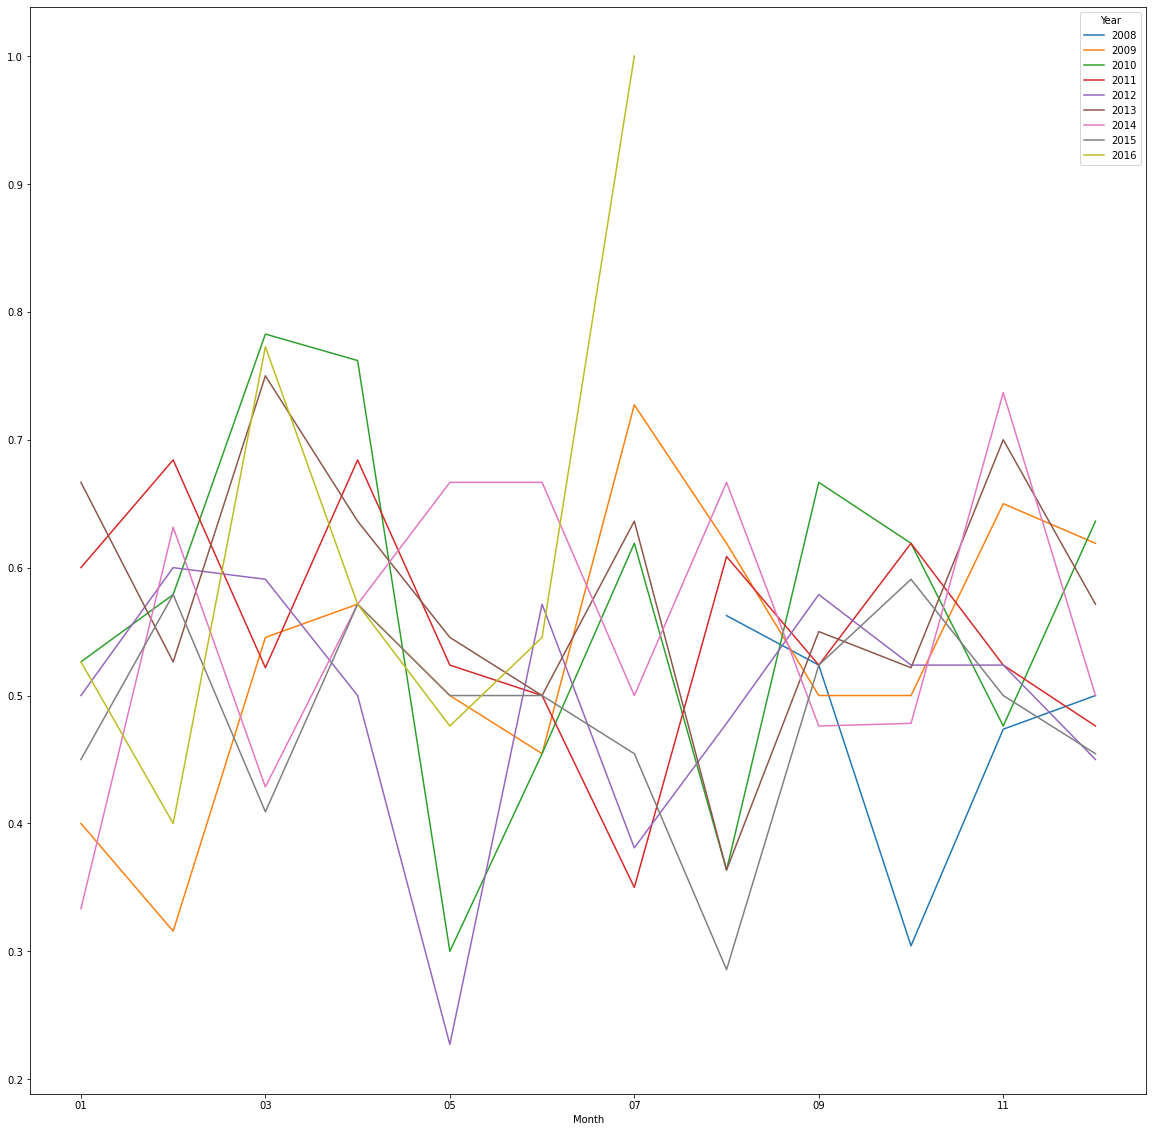

In [45]:
df_plot_mean.plot(figsize=(20,20))

In [ ]:
### Now we have selected facebook as company for doing our analysis

In [412]:
pd_company_stock = pd.read_csv("FB.csv")

In [413]:
pd_company_stock.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [414]:
pd_company_stock.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
1975,2020-03-26,158.250000,164.000000,157.020004,163.339996,163.339996,26556800
1976,2020-03-27,158.199997,160.089996,154.750000,156.789993,156.789993,24879900
1977,2020-03-30,159.179993,166.750000,158.059998,165.949997,165.949997,22515200
1978,2020-03-31,165.479996,170.929993,164.199997,166.800003,166.800003,23676300
1979,2020-04-01,161.619995,164.149994,158.039993,159.600006,159.600006,19491500


In [415]:
### Convert Date Format to dd-mm-yyyy
def change_date_format(dt):
    """This Function converts date to dd-mm-yyyy"""
    date_formet = list()
    for i in dt:
        #print(i)
        dtp=re.sub(r'(\d{4})-(\d{1,2})-(\d{1,2})', '\\3-\\2-\\1', i) 
        #print(type(dtp))
        dtp = dtp.split('-')
        dtp = ''.join(dtp)
        #print(dtp)
        date_formet.append(str(dtp))
    return date_formet

In [416]:
dt_formet = change_date_format(pd_company_stock["Date"])

In [417]:
pd_company_stock["Date"] = dt_formet

In [418]:
pd_company_stock.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,18052012,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,21052012,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,22052012,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,23052012,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,24052012,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [419]:
### Now select data which has Amazon token in it
def DataFrame_Creation(data_comp,company):
    """This Function creates data frame for Analysis for a given company"""
    len_df = len(data_comp)
    #print(len_df)
    data_list = list()
    for i in range(len_df):
        if company in data_comp["Tokens"][i]:
#             print(data_comp["Tokens"][i])
#             print(data_comp.iloc[i,:])
            data_list.append(i)
        else:
            pass
    return data_list

In [420]:
l1=DataFrame_Creation(data_input_new,"facebook")

In [421]:
### Total Number of news article having related to "Google"
len(l1)

222

In [422]:
data_company = data_input_new.iloc[l1,:]

In [423]:
### Top 5 Records
data_company.head(5)

,Date,Label,News_Headlines,News Processed,Tokens,Sentiment,Month,Year
575,22-11-2010,0,"Tim Berners-Lee, creator of the world wide web...",tim bernerslee creator of the world wide web w...,"[tim, bernerslee, creator, world, wide, web, w...",NEGATIVE,11,2010
648,09-03-2011,0,Chinese dissident creates a Facebook account u...,chinese dissident creates a facebook account u...,"[chinese, dissident, create, facebook, account...",NEGATIVE,03,2011
750,04-08-2011,0,Facebook facial recognition software violates ...,facebook facial recognition software violates ...,"[facebook, facial, recognition, software, viol...",NEGATIVE,08,2011
869,25-01-2012,1,Europe is considering a sweeping new law that ...,europe is considering a sweeping new law that ...,"[europe, consider, sweeping, new, law, force, ...",NEGATIVE,01,2012
906,19-03-2012,1,Iranians respond to Israeli Facebook initiativ...,iranians respond to israeli facebook initiativ...,"[iranian, respond, israeli, facebook, initiati...",NEGATIVE,03,2012


In [424]:
### Convert date formet to ddmmyyyy
### Convert Date Format to dd-mm-yyyy
def change_date_format_V1(dt):
    """This Function converts date to ddmmyyyy"""
    date_formet = list()
    for i in dt:
        dtp = i.split('-')
        dtp = ''.join(dtp)
        date_formet.append(str(dtp))
    return date_formet

In [425]:
dt2 = change_date_format_V1(data_company["Date"])

In [426]:
data_company["Date"] = dt2

C:\Users\616777\Anaconda3\envs\pyton_test\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [427]:
### Now Merge data_comapny and pd_company_input to create new data frame by using inner join and date as key.
data_for_analysis=pd_company_stock.merge(data_company,on="Date",how='inner')

In [428]:
data_for_analysis.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Label,News_Headlines,News Processed,Tokens,Sentiment,Month,Year
0,13062012,27.660000,28.10,27.100000,27.270000,27.270000,17102800,0,A New Zealand family who believed their teenag...,a new zealand family who believed their teenag...,"[new, zealand, family, believe, teenage, daugh...",NEGATIVE,06,2012
1,15062012,28.510000,30.10,28.350000,30.010000,30.010000,43563800,1,Indonesian man jailed for two-and-a-half years...,indonesian man jailed for twoandahalf years fo...,"[indonesian, man, jail, twoandahalf, year, wri...",NEGATIVE,06,2012
2,13072012,31.040001,31.07,30.559999,30.719999,30.719999,8108300,1,Iranian father arrested for son's facebook pag...,iranian father arrested for sons facebook page...,"[iranian, father, arrest, son, facebook, page,...",NEGATIVE,07,2012
3,19072012,29.410000,29.50,28.629999,29.000000,29.000000,13685100,1,Australian Government Moves to Expand Surveill...,australian government moves to expand surveill...,"[australian, government, move, expand, surveil...",NEGATIVE,07,2012
4,10082012,21.410000,21.82,21.129999,21.809999,21.809999,25794700,1,Facebook 'should help pay for illegal parties'...,facebook should help pay for illegal parties a...,"[facebook, help, pay, illegal, party, accord, ...",NEGATIVE,08,2012


In [429]:
len(data_for_analysis)

137

In [485]:
### Now Train and Test Split
train = data_for_analysis.iloc[:110,:]
test = data_for_analysis.iloc[101:,:]

In [486]:
test.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Label,News_Headlines,News Processed,Tokens,Sentiment,Month,Year
101,20052015,80.470001,81.099998,79.459999,80.550003,80.550003,23056900,0,Facebook criticised for creating 'two tier int...,facebook criticised for creating two tier inte...,"[facebook, criticise, create, tier, internet, ...",NEGATIVE,05,2015
102,10062015,80.830002,82.599998,80.809998,82.160004,82.160004,21531200,1,'The biggest leak in Polish history'. Thousand...,the biggest leak in polish history thousands o...,"[biggest, leak, polish, history, thousand, pag...",NEGATIVE,06,2015
103,13072015,88.660004,90.220001,88.419998,90.099998,90.099998,29976700,1,Ethiopian LGBT Activist Banned by Facebook Und...,ethiopian lgbt activist banned by facebook und...,"[ethiopian, lgbt, activist, ban, facebook, rea...",NEGATIVE,07,2015
104,30072015,94.910004,95.809998,91.800003,95.209999,95.209999,86211300,0,Spanish man fined up to 600 under new gag laws...,spanish man fined up to under new gag laws for...,"[spanish, man, fin, new, gag, law, call, polic...",NEGATIVE,07,2015
105,30072015,94.910004,95.809998,91.800003,95.209999,95.209999,86211300,0,Facebook ordered to allow fake user names in G...,facebook ordered to allow fake user names in g...,"[facebook, order, allow, fake, user, name, ger...",NEGATIVE,07,2015


In [487]:
headlines = []
for row in range(0,len(train.index)):
    headlines.append(' '.join(str(x) for x in train.iloc[row,[1,2,3,4,5,6,9,11]]))

In [478]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [488]:
## implement BAG OF WORDS
countvector=CountVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(headlines)

In [489]:
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,train['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [490]:
## Predict for the Test Dataset
test_data= []
for row in range(0,len(test.index)):
    test_data.append(' '.join(str(x) for x in test.iloc[row,[1,2,3,4,5,6,9,11]]))
test_dataset = countvector.transform(test_data)
prediction = randomclassifier.predict(test_dataset)
test["Predicted"] = prediction

C:\Users\616777\Anaconda3\envs\pyton_test\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
## Accuracy Calculation

In [491]:
matrix_confusion=confusion_matrix(test['Label'],prediction)
print(matrix_confusion)

[[12  4]
 [11  9]]


In [492]:
score_cal=accuracy_score(test['Label'],prediction)
print(score_cal)

0.5833333333333334


In [493]:
report=classification_report(test['Label'],predictions)
print(report)

              precision    recall  f1-score   support

           0       0.44      0.94      0.60        16
           1       0.50      0.05      0.09        20

    accuracy                           0.44        36
   macro avg       0.47      0.49      0.35        36
weighted avg       0.47      0.44      0.32        36



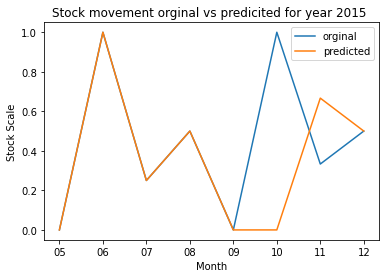

In [509]:
### stockmovement in year 2015
df_plot_month = test[test['Year'] == '2015']['Month'].unique()
df_plot_month = list(df_plot_month)
df_plot_2015 = test[test['Year'] == '2015'].groupby("Month")['Label'].mean()
df_plot_2015 = list(df_plot_2015)
df_plot_2015_p = test[test['Year'] == '2015'].groupby("Month")['Predicted'].mean()
df_plot_2015_p = list(df_plot_2015_p)
plt.plot(df_plot_month, df_plot_2015, label = "orginal")
plt.plot(df_plot_month, df_plot_2015_p, label = "predicted")
plt.xlabel('Month')
# Set the y axis label of the current axis.
plt.ylabel('Stock Scale')
# Set a title of the current axes.
plt.title('Stock movement orginal vs predicited for year 2015 ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

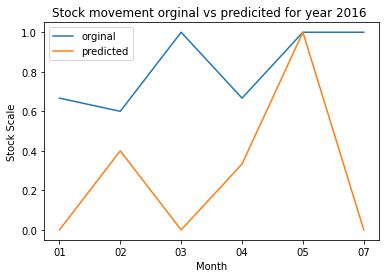

In [510]:
### stockmovement in year 2016
df_plot_month = test[test['Year'] == '2016']['Month'].unique()
df_plot_month = list(df_plot_month)
df_plot_2016 = test[test['Year'] == '2016'].groupby("Month")['Label'].mean()
df_plot_2016 = list(df_plot_2016)
df_plot_2016_p = test[test['Year'] == '2016'].groupby("Month")['Predicted'].mean()
df_plot_2016_p = list(df_plot_2016_p)
plt.plot(df_plot_month, df_plot_2016, label = "orginal")
plt.plot(df_plot_month, df_plot_2016_p, label = "predicted")
plt.xlabel('Month')
# Set the y axis label of the current axis.
plt.ylabel('Stock Scale')
# Set a title of the current axes.
plt.title('Stock movement orginal vs predicited for year 2016 ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()